「AI創薬・ケモインフォマティクス」第3回「計算機実験1」講義資料　（講師：小寺正明）

1月29日(金)19:40～21:10

# Sample Dataset Generator のインストール

In [1]:
!pip install git+https://github.com/maskot1977/sampledataset_generator.git

  Cloning https://github.com/maskot1977/sampledataset_generator.git to /tmp/pip-req-build-81ews6ed
  Running command git clone -q https://github.com/maskot1977/sampledataset_generator.git /tmp/pip-req-build-81ews6ed
  Created wheel for sampledataset-generator: filename=sampledataset_generator-0.1.0-cp36-none-any.whl size=4344 sha256=f6a7ff53da9941b8b92100320328352bdc5dc629d1e3bdab876b7994be63f3a2
  Stored in directory: /tmp/pip-ephem-wheel-cache-5uxbevsq/wheels/45/04/cf/e9f65e7ff4100654a7511503a2873b57e5f83431fccef54f2c
Successfully built sampledataset-generator


# Sample Dataset の生成

In [2]:
from sampledataset_generator import generator

dataset = generator.SampleDatasetGenerator(n_samples=100)
dataset.generate()

In [3]:
dataset.X.shape, dataset.Y.shape

((100, 10), (100,))

In [4]:
dataset.coef

array([ 9.22,  3.74,  1.39, -4.41, -4.49,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ])

## 線形回帰用データの作成

In [5]:
import numpy as np
import pandas as pd

df = pd.DataFrame(dataset.X)
df.columns = ["x" + str(i + 1) for i in range(dataset.X.shape[1])]
df['Y1'] = dataset.Y

## 線形分類用データの作成

In [6]:
dataset.categoricalize()
df['Y2'] = dataset.Y

## 非線形回帰用データの作成

In [7]:
my_function = lambda X, coef: X[:, 0] ** 2 + X[:, 1] * (1 - X[:, 2]) + X[:, 3] * (1 - X[:, 4])

dataset.function = my_function
dataset.generateY()
df['Y3'] = dataset.Y

## 非線形分類用データの作成

In [8]:
dataset.categoricalize()
df['Y4'] = dataset.Y

# サンプルデータセットの俯瞰

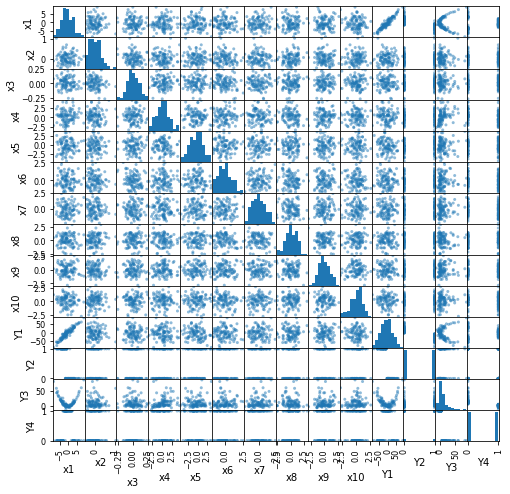

In [9]:
import matplotlib.pyplot as plt

pd.plotting.scatter_matrix(df, figsize=(8, 8))
plt.show()

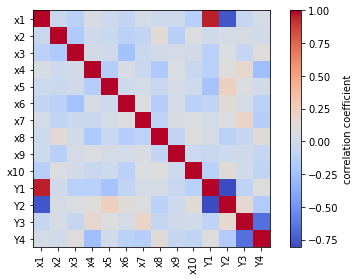

In [10]:
corrcoef = np.corrcoef(df.T.values.tolist())
plt.imshow(corrcoef, interpolation='nearest', cmap=plt.cm.coolwarm)
plt.colorbar(label='correlation coefficient')
tick_marks = np.arange(len(corrcoef))
plt.xticks(tick_marks, df.columns, rotation=90)
plt.yticks(tick_marks, df.columns)
plt.tight_layout()

# トレーニングデータ・テストデータへの分割

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :-4], df.iloc[:, -4:], test_size=0.2)

In [12]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((80, 10), (20, 10), (80, 4), (20, 4))

# Optuna のインストール

In [13]:
!pip install optuna

     |████████████████████████████████| 286kB 12.0MB/s 
     |████████████████████████████████| 163kB 23.4MB/s 
     |████████████████████████████████| 81kB 6.1MB/s 
     |████████████████████████████████| 481kB 28.4MB/s 
     |████████████████████████████████| 133kB 22.4MB/s 
     |████████████████████████████████| 112kB 52.3MB/s 
     |████████████████████████████████| 51kB 4.7MB/s 
  Created wheel for Mako: filename=Mako-1.1.4-py2.py3-none-any.whl size=75675 sha256=bde132f1e0302a8de46e1554736d6f119dfc535257cfd9f46d9a0eb1dba4b8df
  Stored in directory: /root/.cache/pip/wheels/ad/10/d3/aeb26e20d19045e2a68e5d3cbb57432e11b5d9c92c99f98d47
  Created wheel for PrettyTable: filename=prettytable-0.7.2-cp36-none-any.whl size=13702 sha256=3c0a7c16a75b54f7ec14696986546c47887d0ac46e8f350eef85fcbd2bb7c5e2
  Stored in directory: /root/.cache/pip/wheels/80/34/1c/3967380d9676d162cb59513bd9dc862d0584e045a162095606
  Created wheel for pyperclip: filename=pyperclip-1.8.1-cp36-none-any.whl size=11120 sh

# scikitallstars のインストール

In [14]:
!pip install git+https://github.com/maskot1977/scikitallstars.git

  Cloning https://github.com/maskot1977/scikitallstars.git to /tmp/pip-req-build-83tq4b5q
  Running command git clone -q https://github.com/maskot1977/scikitallstars.git /tmp/pip-req-build-83tq4b5q
  Created wheel for scikitallstars: filename=scikitallstars-0.1.0-cp36-none-any.whl size=8139 sha256=037d25d18b1ed085338bcf20edf26300944b18da5aa995b307502a2e1e34f69e
  Stored in directory: /tmp/pip-ephem-wheel-cache-958eif5i/wheels/4e/29/19/636616d7dbaa906e344589b8f3b37f288d226fb770e91e4478
Successfully built scikitallstars


# Optuna + scikitallstars を用いた学習

## 線形データの回帰

In [15]:
import optuna
from scikitallstars import all_sklearn

optuna.logging.set_verbosity(optuna.logging.WARN)
objective1 = all_sklearn.Objective(X_train, y_train['Y1'], X_test, y_test['Y1'])
#objective1 = all_sklearn.Objective(X_train, y_train['Y1'])
study1 = optuna.create_study(direction='maximize')
study1.optimize(objective1, timeout=20)

## 計算結果のサマリー

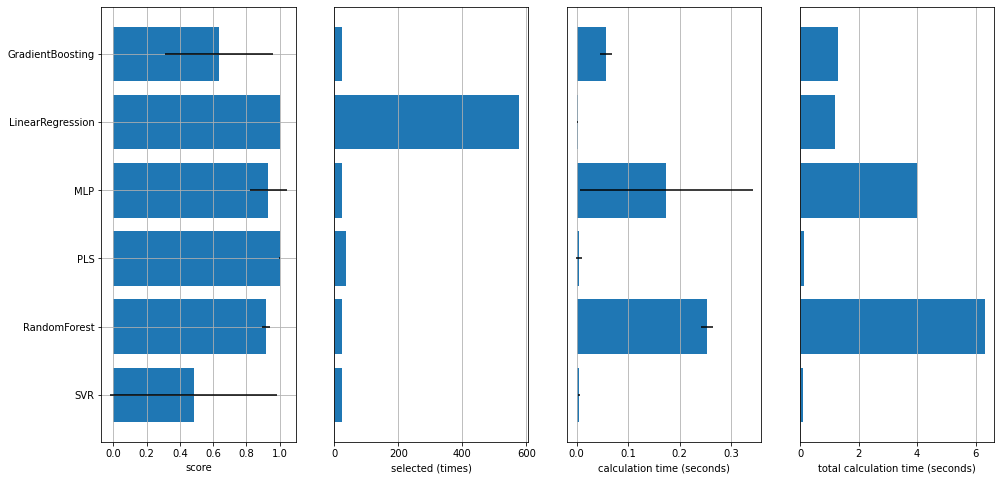

In [16]:
all_sklearn.objective_summary(objective1)

## ベストスコアを出したモデル

In [17]:
objective1.best_scores

{'GradientBoosting': 0.9584292489204892,
 'LinearRegression': 1.0,
 'MLP': 0.997599962611316,
 'PLS': 1.0,
 'RandomForest': 0.9379010981402055,
 'SVR': 0.9999960297739564}

In [18]:
study1.best_trial

FrozenTrial(number=9, values=[1.0], datetime_start=datetime.datetime(2021, 1, 28, 13, 35, 11, 651383), datetime_complete=datetime.datetime(2021, 1, 28, 13, 35, 11, 668292), params={'standardize': 'NoScaler', 'regressor_name': 'LinearRegression'}, distributions={'standardize': CategoricalDistribution(choices=('NoScaler', 'StandardScaler', 'MinMaxScaler')), 'regressor_name': CategoricalDistribution(choices=('RandomForest', 'SVR', 'MLP', 'LinearRegression', 'PLS', 'GradientBoosting'))}, user_attrs={}, system_attrs={}, intermediate_values={}, trial_id=9, state=TrialState.COMPLETE, value=None)

In [19]:
[model.model for name, model in objective1.best_models.items()]

[RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                       max_depth=23, max_features='auto', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=None, verbose=0, warm_start=False),
 PLSRegression(copy=True, max_iter=2000, n_components=10, scale=True, tol=1e-06),
 GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                           init=None, learning_rate=0.05955720968323824,
                           loss='ls', max_depth=3, max_features=None,
                           max_leaf_nodes=None, min_impurity_decrease=0.0,
                           min_impurity_split=None, min_samples_leaf=1,
                           min_samples_split=2, 

# ベストモデルを用いた予測

In [20]:
objective1.best_model.predict(X_test)

array([  5.61213075,   9.29761888,  25.80949353, -75.90147856,
       -23.42603338,  37.49246256,  -0.20101696, -18.3167526 ,
        10.76900064, -36.15841825, -58.66208334, -57.30758124,
        57.58344801, -38.14776923,  -0.61709001, -53.11209925,
       -41.25873041,  14.32144908,   3.95198172, -29.84716685])

## 特定のベストモデルを用いた予測

In [21]:
objective1.best_models['RandomForest'].predict(X_test)

array([  8.31637752,   5.61535843,  31.85054246, -60.56898484,
       -24.34295494,  36.36270849,  -5.21136251,  -6.63005307,
        11.69881699, -47.3495689 , -50.0006067 , -55.86928872,
        56.81891862, -36.69357597,   3.92981963, -43.04134474,
       -40.69875563,  -3.22360104,  -5.30392684, -12.5371659 ])

## 特定のモデルだけを用いて学習する

In [22]:
import optuna
from scikitallstars import all_sklearn

optuna.logging.set_verbosity(optuna.logging.WARN)
objectivex = all_sklearn.Objective(X_train, y_train['Y1'], X_test, y_test['Y1'], regressor_names = ['RandomForest'])
studyx = optuna.create_study(direction='maximize')
studyx.optimize(objectivex, timeout=20)

In [23]:
objectivex.best_scores

{'RandomForest': 0.9406681246450035}

# train, valid, test の３つに分割して学習と検証

In [24]:
import optuna
from scikitallstars import all_sklearn

optuna.logging.set_verbosity(optuna.logging.WARN)
#objective1 = all_sklearn.Objective(X_train, y_train['Y1'], X_test, y_test['Y1'])
objective1 = all_sklearn.Objective(X_train, y_train['Y1'])
study1 = optuna.create_study(direction='maximize')
study1.optimize(objective1, timeout=20)

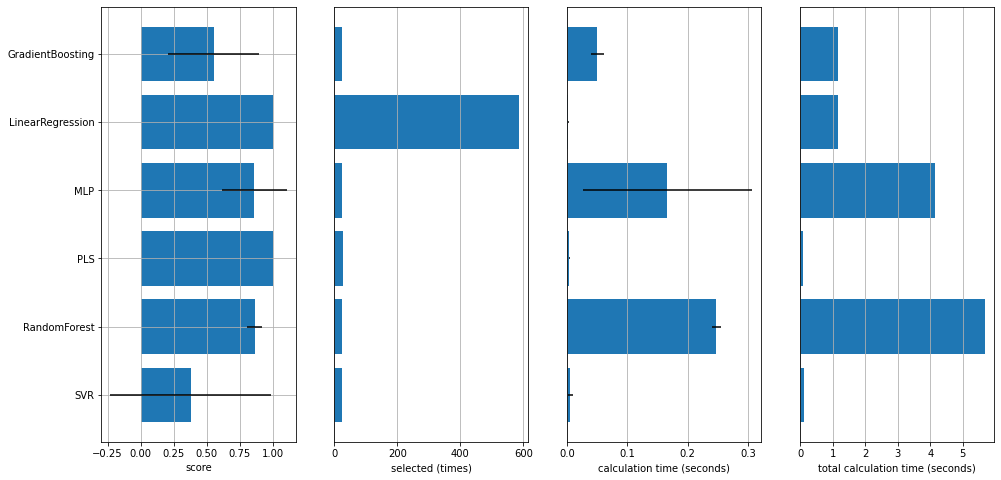

In [25]:
all_sklearn.objective_summary(objective1)

In [26]:
objective1.best_model.predict(X_test)

array([[  5.61213075],
       [  9.29761888],
       [ 25.80949353],
       [-75.90147856],
       [-23.42603338],
       [ 37.49246256],
       [ -0.20101696],
       [-18.3167526 ],
       [ 10.76900064],
       [-36.15841825],
       [-58.66208334],
       [-57.30758124],
       [ 57.58344801],
       [-38.14776923],
       [ -0.61709001],
       [-53.11209925],
       [-41.25873041],
       [ 14.32144908],
       [  3.95198172],
       [-29.84716685]])

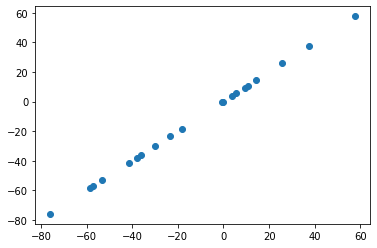

In [27]:
plt.scatter(y_test['Y1'], objective1.best_model.predict(X_test))

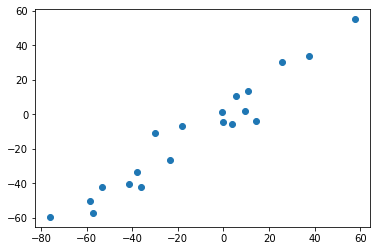

In [28]:
plt.scatter(y_test['Y1'], objective1.best_models['RandomForest'].predict(X_test))

# 線形データの分類

In [29]:
import optuna
from scikitallstars import all_sklearn

optuna.logging.set_verbosity(optuna.logging.WARN)
#objective2 = all_sklearn.Objective(X_train, y_train['Y2'], X_test, y_test['Y2'])
objective2 = all_sklearn.Objective(X_train, y_train['Y2'])
study2 = optuna.create_study(direction='maximize')
study2.optimize(objective2, timeout=30)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.6/dist-packages/sklearn

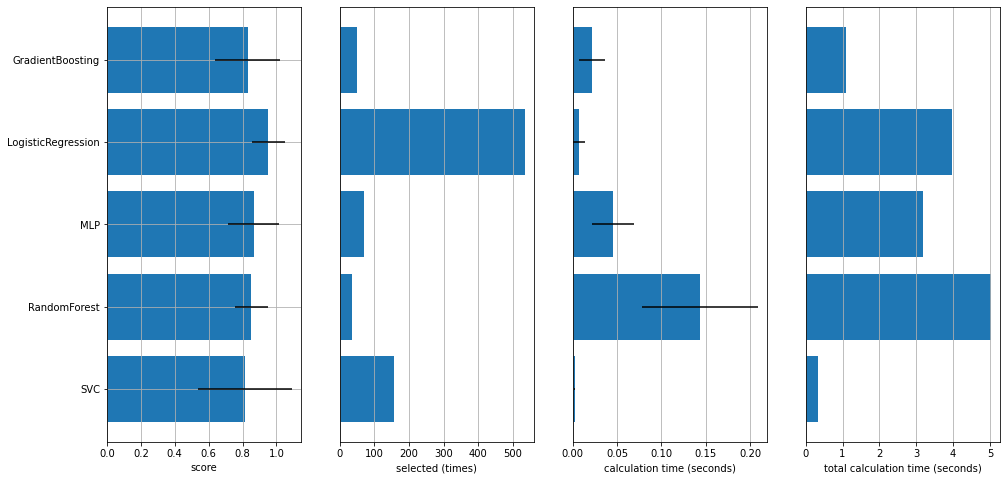

In [30]:
all_sklearn.objective_summary(objective2)

In [31]:
objective2.best_scores

{'GradientBoosting': 1.0,
 'LogisticRegression': 1.0,
 'MLP': 1.0,
 'RandomForest': 1.0,
 'SVC': 1.0}

In [32]:
study2.best_trial

FrozenTrial(number=4, values=[1.0], datetime_start=datetime.datetime(2021, 1, 28, 13, 36, 12, 422666), datetime_complete=datetime.datetime(2021, 1, 28, 13, 36, 12, 501210), params={'standardize': 'MinMaxScaler', 'classifier_name': 'MLP', 'n_layers': 7, '0': 29, '1': 42, '2': 17, '3': 45, '4': 68, '5': 10, '6': 97, 'learning_rate_init': 0.003331884668797917}, distributions={'standardize': CategoricalDistribution(choices=('NoScaler', 'StandardScaler', 'MinMaxScaler')), 'classifier_name': CategoricalDistribution(choices=('RandomForest', 'SVC', 'MLP', 'LogisticRegression', 'GradientBoosting')), 'n_layers': IntUniformDistribution(high=10, low=1, step=1), '0': IntUniformDistribution(high=100, low=10, step=1), '1': IntUniformDistribution(high=100, low=10, step=1), '2': IntUniformDistribution(high=100, low=10, step=1), '3': IntUniformDistribution(high=100, low=10, step=1), '4': IntUniformDistribution(high=100, low=10, step=1), '5': IntUniformDistribution(high=100, low=10, step=1), '6': IntUnif

In [33]:
[model.model for name, model in objective2.best_models.items()]

[RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                        criterion='gini', max_depth=2, max_features=0.4,
                        max_leaf_nodes=None, max_samples=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=-1,
                        oob_score=False, random_state=None, verbose=0,
                        warm_start=False),
 MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
               beta_2=0.999, early_stopping=True, epsilon=1e-08,
               hidden_layer_sizes={97, 68, 42, 10, 45, 17, 29},
               learning_rate='constant', learning_rate_init=0.003331884668797917,
               max_fun=15000, max_iter=2000, momentum=0.9, n_iter_no_change=10,
               nesterovs_momentum=True, power_t=0.5, random_state=None,
            

In [34]:
objective2.best_model.predict(X_test)

array([0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1])

In [35]:
objective2.best_models['RandomForest'].predict(X_test)

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0])

## 非線形データの回帰

In [36]:
import optuna
from scikitallstars import all_sklearn

#optuna.logging.set_verbosity(optuna.logging.DEBUG)
optuna.logging.set_verbosity(optuna.logging.WARN)
objective3 = all_sklearn.Objective(X_train, y_train['Y3'])
study3 = optuna.create_study(direction='maximize')
study3.optimize(objective3, timeout=10) # 大変時間がかかるので注意
objective3.best_scores

{'GradientBoosting': 0.5737395918398094,
 'LinearRegression': 0.03691878660661663,
 'MLP': 0.5107134607344386,
 'PLS': 0.13992063298863522,
 'RandomForest': 0.9307604423776044,
 'SVR': 0.7379819616062036}

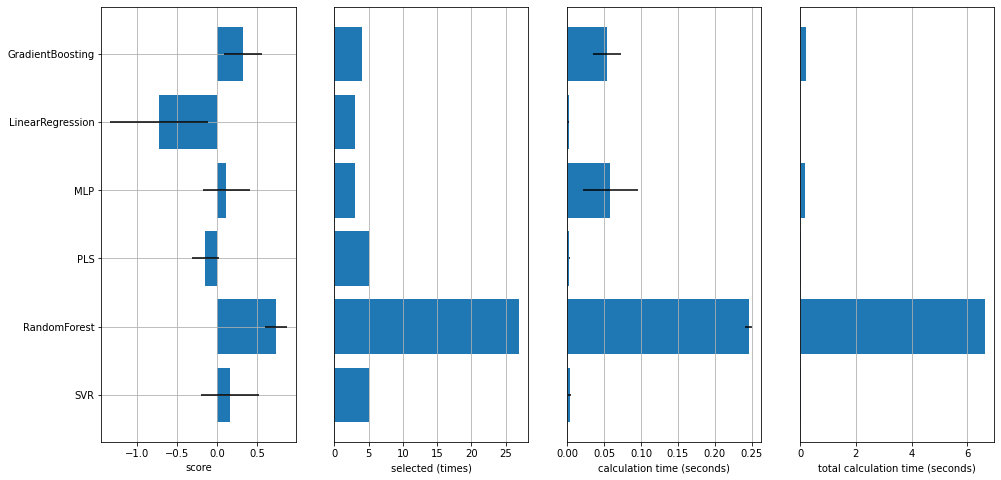

In [37]:
all_sklearn.objective_summary(objective3)

# 非線形データの分類

In [38]:
import optuna
from scikitallstars import all_sklearn

optuna.logging.set_verbosity(optuna.logging.WARN)
objective4 = all_sklearn.Objective(X_train, y_train['Y4'])
study4 = optuna.create_study(direction='maximize')
study4.optimize(objective4, timeout=10) # 大変時間がかかるので注意
objective4.best_scores

'classifier.fit' terminated since it did not finish in 5 second(s).


{'GradientBoosting': 0.6086956521739131,
 'LogisticRegression': 0.7058823529411765,
 'RandomForest': 0.923076923076923,
 'SVC': 0.6666666666666666}

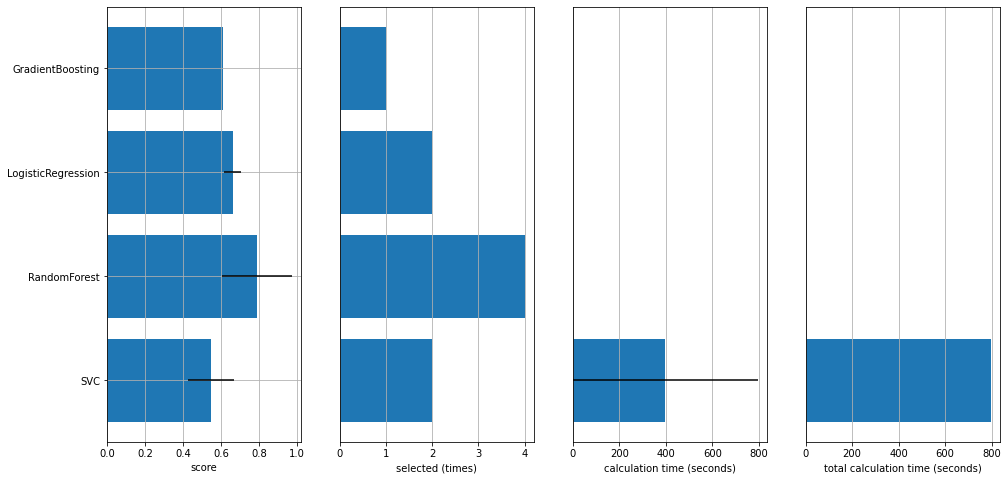

In [39]:
all_sklearn.objective_summary(objective4)

# SHAP のインストール

In [40]:
!pip install shap

     |████████████████████████████████| 358kB 11.1MB/s 
  Created wheel for shap: filename=shap-0.38.1-cp36-cp36m-linux_x86_64.whl size=489408 sha256=246c4dbf3b09cd68f93a75b8699b0ed34c195af67a22da7c58c6ed78e07e68da
  Stored in directory: /root/.cache/pip/wheels/a8/fb/e4/88012be41842b9be62ae18d82d1b1e880daf8539d1fef1fa00
Successfully built shap


# 線形データの回帰結果の解析

In [41]:
objective1.best_model.model

PLSRegression(copy=True, max_iter=2000, n_components=10, scale=True, tol=1e-06)

In [42]:
import shap 
pred_func = lambda X: objective1.best_model.predict(X).reshape(len(X))
explainer = shap.KernelExplainer(pred_func, dataset.X)
shap_values = explainer.shap_values(dataset.X)

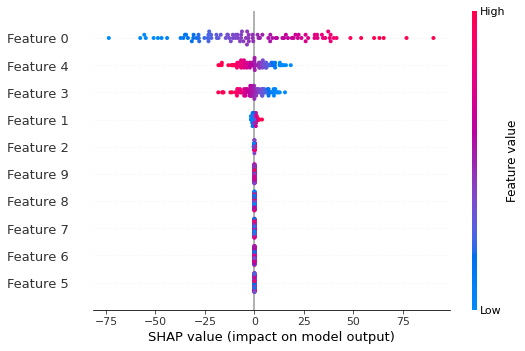

In [43]:
shap.summary_plot(shap_values, features=dataset.X, plot_type="dot")

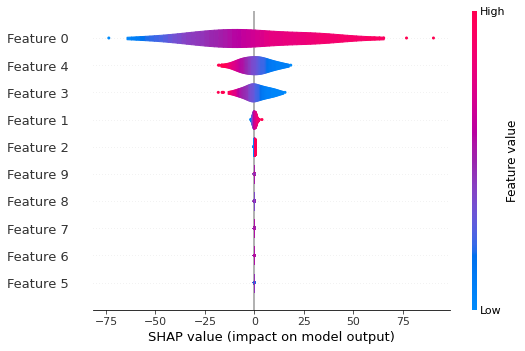

In [44]:
shap.summary_plot(shap_values, features=dataset.X, plot_type="violin")

invalid value encountered in true_divide


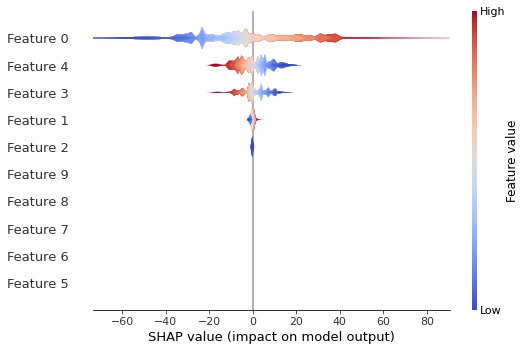

In [45]:
shap.summary_plot(shap_values, features=dataset.X, plot_type="layered_violin")

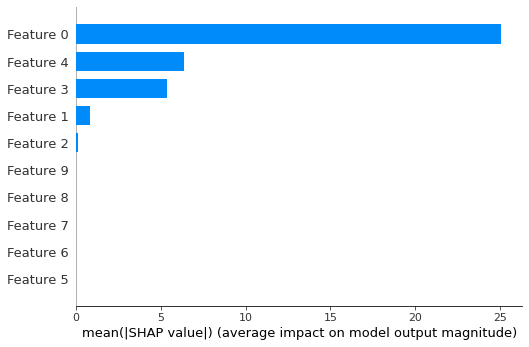

In [46]:
shap.summary_plot(shap_values, features=dataset.X, plot_type="bar")

invalid value encountered in true_divide
invalid value encountered in true_divide


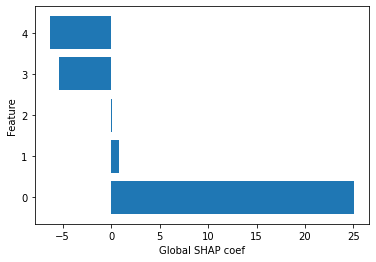

In [47]:
global_shap_values = np.abs(shap_values).mean(0)
shap_corr = [np.corrcoef(shap_values[:, i], dataset.X[:, i])[0, 1] for i in range(len(shap_values.T))]
global_shap_coefs = np.array(global_shap_values) * np.array(shap_corr)
plt.barh(range(len(global_shap_coefs)), global_shap_coefs)
plt.xlabel("Global SHAP coef")
plt.ylabel("Feature")
plt.show()

## 線形データ構築に用いたパラメータとの比較

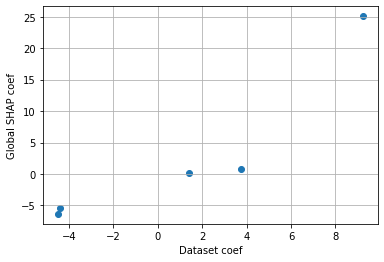

In [48]:
plt.scatter(dataset.coef, global_shap_coefs)
plt.grid()
plt.xlabel("Dataset coef")
plt.ylabel("Global SHAP coef")
plt.show()

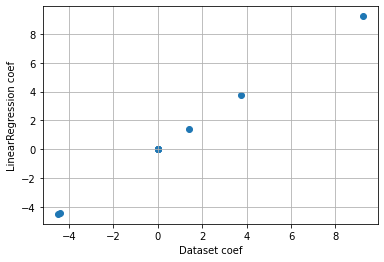

In [49]:
plt.scatter(dataset.coef, objective1.best_models['LinearRegression'].model.coef_)
plt.grid()
plt.xlabel("Dataset coef")
plt.ylabel("LinearRegression coef")
plt.show()

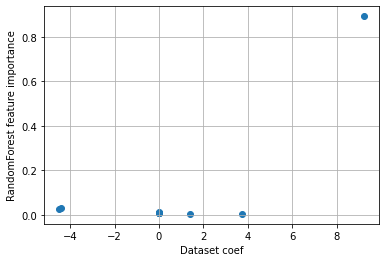

In [50]:
plt.scatter(dataset.coef, objective1.best_models['RandomForest'].model.feature_importances_)
plt.grid()
plt.xlabel("Dataset coef")
plt.ylabel("RandomForest feature importance")
plt.show()

# 線形データの分類結果の解析

In [51]:
objective2.best_model.model

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=True, epsilon=1e-08,
              hidden_layer_sizes={97, 68, 42, 10, 45, 17, 29},
              learning_rate='constant', learning_rate_init=0.003331884668797917,
              max_fun=15000, max_iter=2000, momentum=0.9, n_iter_no_change=10,
              nesterovs_momentum=True, power_t=0.5, random_state=None,
              shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
              verbose=False, warm_start=False)

In [52]:
import shap 
pred_func = lambda X: objective2.best_model.predict(X).reshape(len(X))
explainer = shap.KernelExplainer(pred_func, dataset.X)
shap_values = explainer.shap_values(dataset.X)

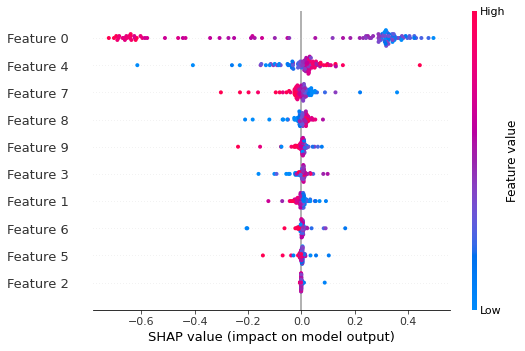

In [53]:
shap.summary_plot(shap_values, features=dataset.X, plot_type="dot")

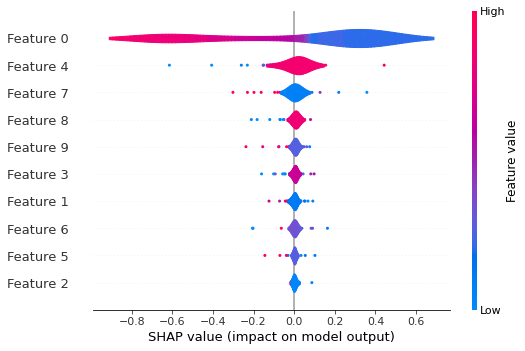

In [54]:
shap.summary_plot(shap_values, features=dataset.X, plot_type="violin")

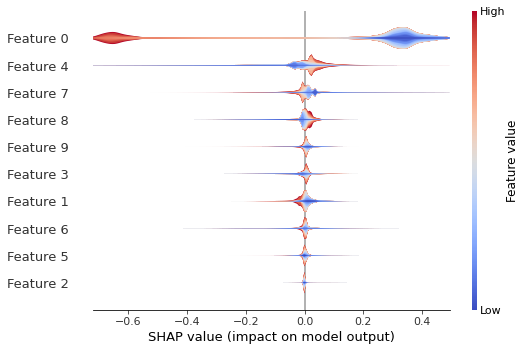

In [55]:
shap.summary_plot(shap_values, features=dataset.X, plot_type="layered_violin")

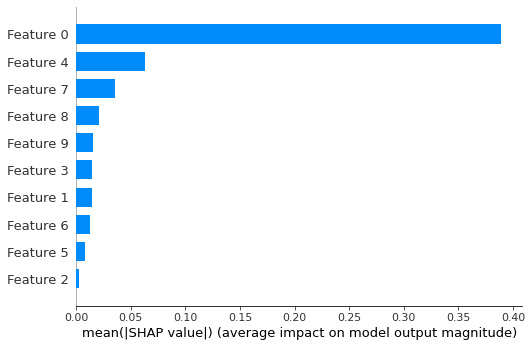

In [56]:
shap.summary_plot(shap_values, features=dataset.X, plot_type="bar")

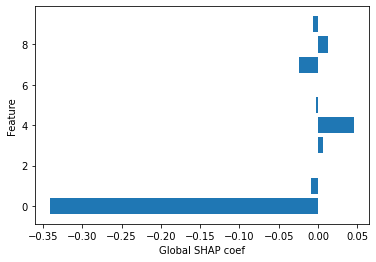

In [57]:
global_shap_values = np.abs(shap_values).mean(0)
shap_corr = [np.corrcoef(shap_values[:, i], dataset.X[:, i])[0, 1] for i in range(len(shap_values.T))]
global_shap_coefs = np.array(global_shap_values) * np.array(shap_corr)
plt.barh(range(len(global_shap_coefs)), global_shap_coefs)
plt.xlabel("Global SHAP coef")
plt.ylabel("Feature")
plt.show()

## 線形データ構築に用いたパラメータとの比較

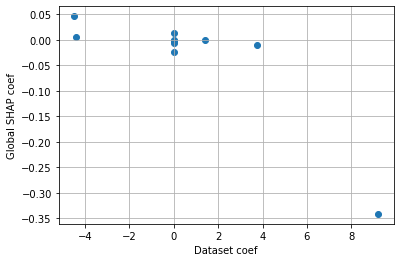

In [58]:
plt.scatter(dataset.coef, global_shap_coefs)
plt.grid()
plt.xlabel("Dataset coef")
plt.ylabel("Global SHAP coef")
plt.show()

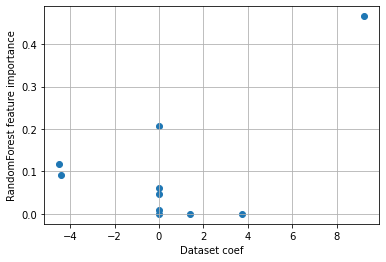

In [59]:
plt.scatter(dataset.coef, objective2.best_models['RandomForest'].model.feature_importances_)
plt.grid()
plt.xlabel("Dataset coef")
plt.ylabel("RandomForest feature importance")
plt.show()

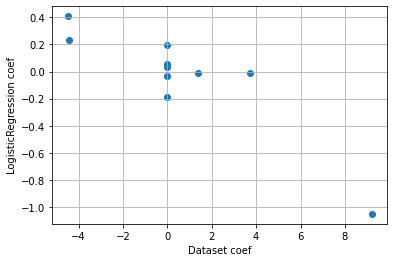

In [60]:
plt.scatter(dataset.coef, objective2.best_models['LogisticRegression'].model.coef_)
plt.grid()
plt.xlabel("Dataset coef")
plt.ylabel("LogisticRegression coef")
plt.show()

# 非線形データの回帰結果の解析

In [61]:
objective3.best_model.model

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=9, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [62]:
import shap 
pred_func = lambda X: objective3.best_model.predict(X).reshape(len(X))
explainer = shap.KernelExplainer(pred_func, dataset.X)
shap_values = explainer.shap_values(dataset.X)

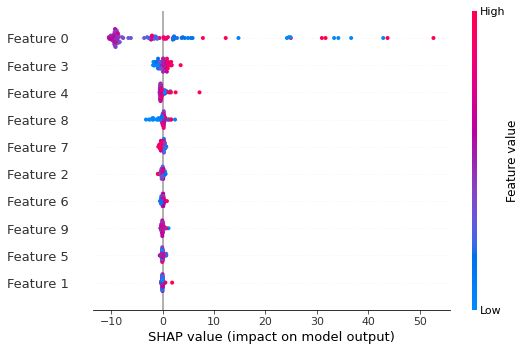

In [63]:
shap.summary_plot(shap_values, features=dataset.X, plot_type="dot")

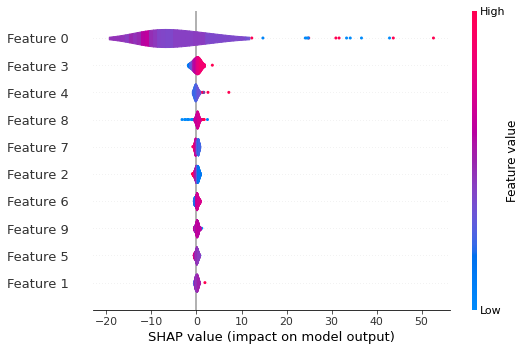

In [64]:
shap.summary_plot(shap_values, features=dataset.X, plot_type="violin")

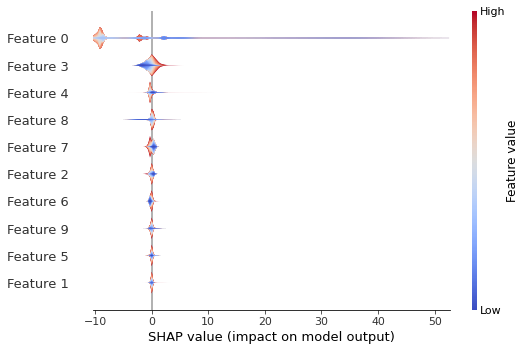

In [65]:
shap.summary_plot(shap_values, features=dataset.X, plot_type="layered_violin")

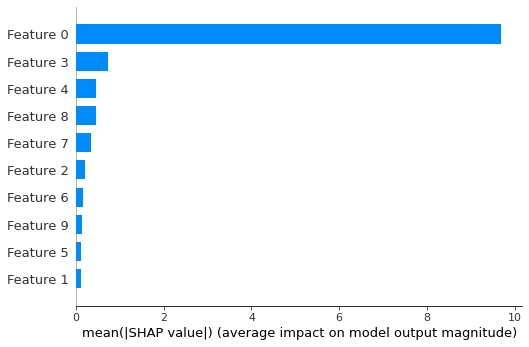

In [66]:
shap.summary_plot(shap_values, features=dataset.X, plot_type="bar")

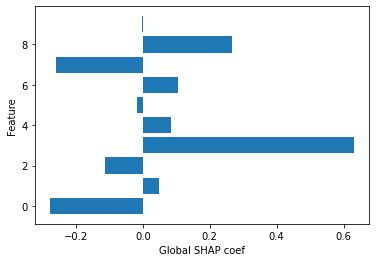

In [67]:
global_shap_values = np.abs(shap_values).mean(0)
shap_corr = [np.corrcoef(shap_values[:, i], dataset.X[:, i])[0, 1] for i in range(len(shap_values.T))]
global_shap_coefs = np.array(global_shap_values) * np.array(shap_corr)
plt.barh(range(len(global_shap_coefs)), global_shap_coefs)
plt.xlabel("Global SHAP coef")
plt.ylabel("Feature")
plt.show()

# 非線形データの分類結果の解析

In [68]:
objective4.best_model.model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [69]:
import shap 
pred_func = lambda X: objective4.best_model.predict(X).reshape(len(X))
explainer = shap.KernelExplainer(pred_func, dataset.X)
shap_values = explainer.shap_values(dataset.X)

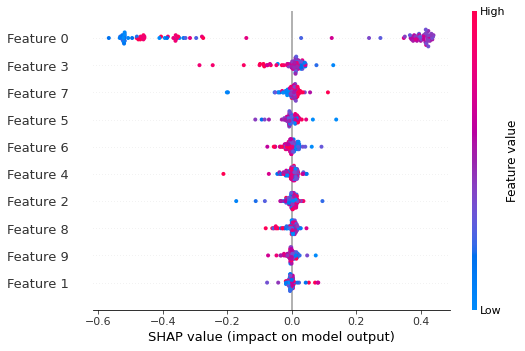

In [70]:
shap.summary_plot(shap_values, features=dataset.X, plot_type="dot")

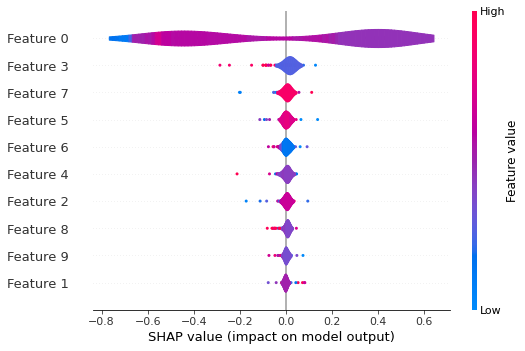

In [71]:
shap.summary_plot(shap_values, features=dataset.X, plot_type="violin")

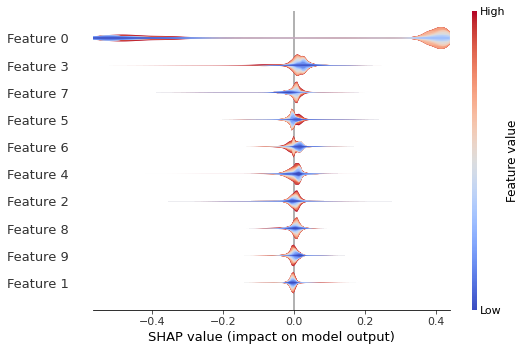

In [72]:
shap.summary_plot(shap_values, features=dataset.X, plot_type="layered_violin")

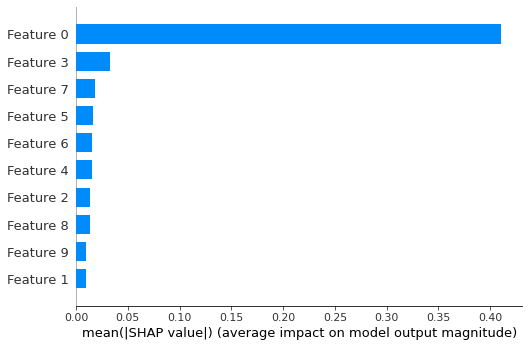

In [73]:
shap.summary_plot(shap_values, features=dataset.X, plot_type="bar")

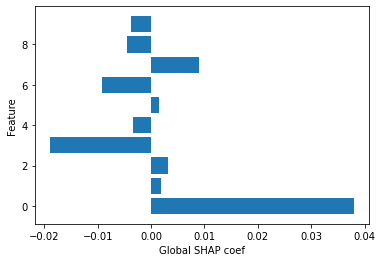

In [74]:
global_shap_values = np.abs(shap_values).mean(0)
shap_corr = [np.corrcoef(shap_values[:, i], dataset.X[:, i])[0, 1] for i in range(len(shap_values.T))]
global_shap_coefs = np.array(global_shap_values) * np.array(shap_corr)
plt.barh(range(len(global_shap_coefs)), global_shap_coefs)
plt.xlabel("Global SHAP coef")
plt.ylabel("Feature")
plt.show()

# Sample Dataset にノイズや共線性を加えたらどうなるか実験

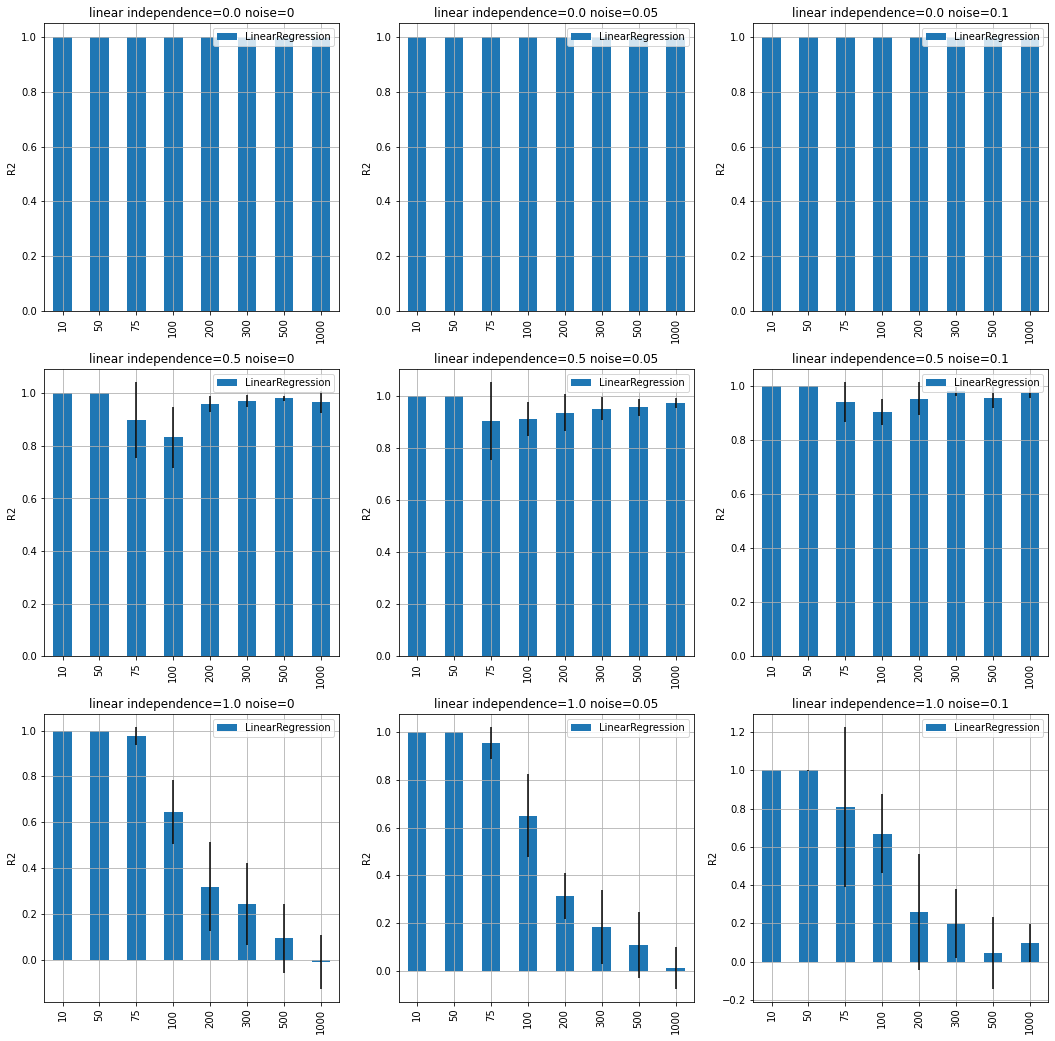

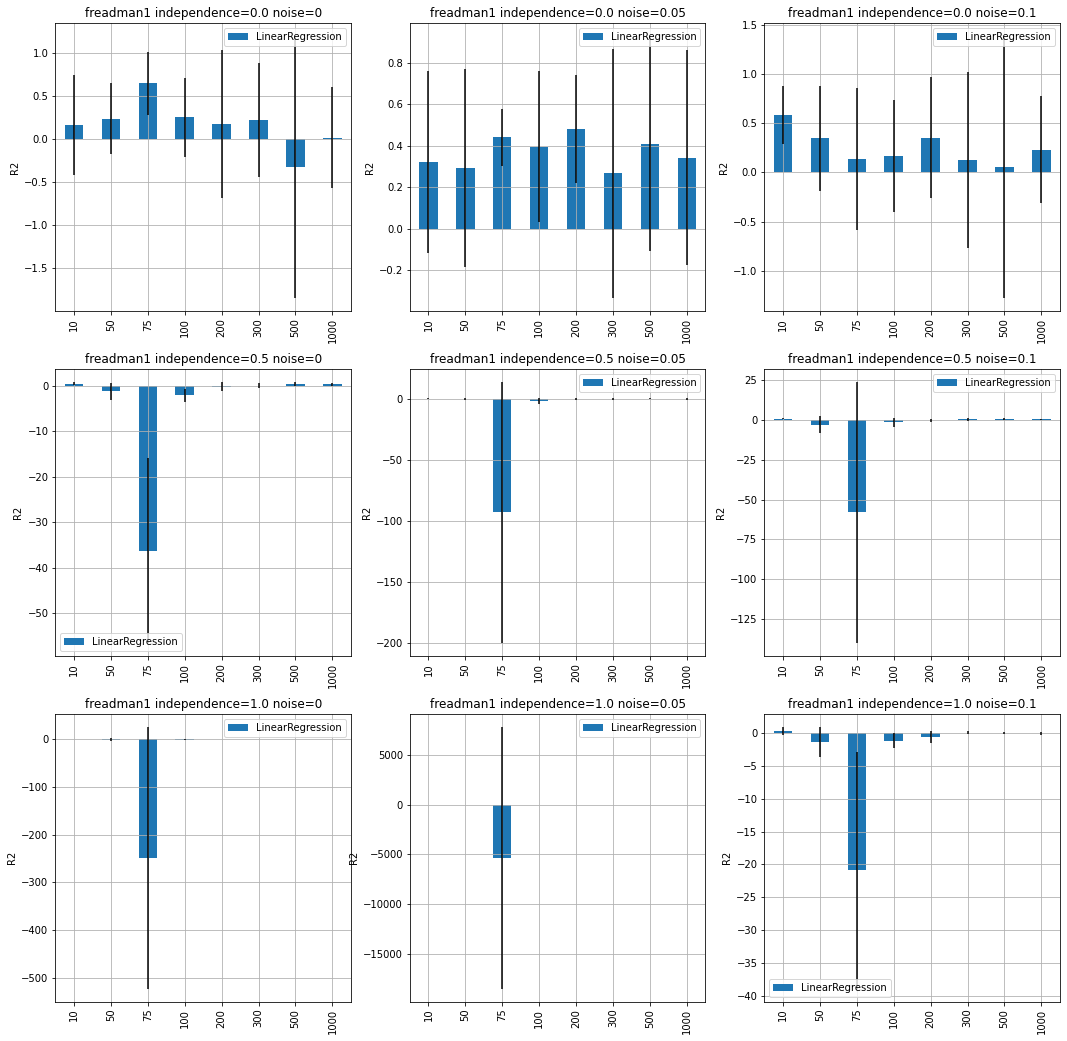

In [75]:
from sampledataset_generator import experiment

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

experiment.benchmark(
    "LinearRegression", 
    make_pipeline(
        StandardScaler(), 
        LinearRegression()
        )
    )

Y residual constant at iteration 5
Y residual constant at iteration 5
Y residual constant at iteration 5
Y residual constant at iteration 5
Y residual constant at iteration 5
Y residual constant at iteration 5
Y residual constant at iteration 5
Y residual constant at iteration 5
Y residual constant at iteration 5
Y residual constant at iteration 5
Y residual constant at iteration 5
Y residual constant at iteration 5
Y residual constant at iteration 5
Y residual constant at iteration 5
Y residual constant at iteration 5
Y residual constant at iteration 5
Y residual constant at iteration 5
Y residual constant at iteration 5
Y residual constant at iteration 5
Y residual constant at iteration 5
Y residual constant at iteration 5
Y residual constant at iteration 5
Y residual constant at iteration 5
Y residual constant at iteration 5
Y residual constant at iteration 5
Y residual constant at iteration 5
Y residual constant at iteration 5
Y residual constant at iteration 5
Y residual constant 

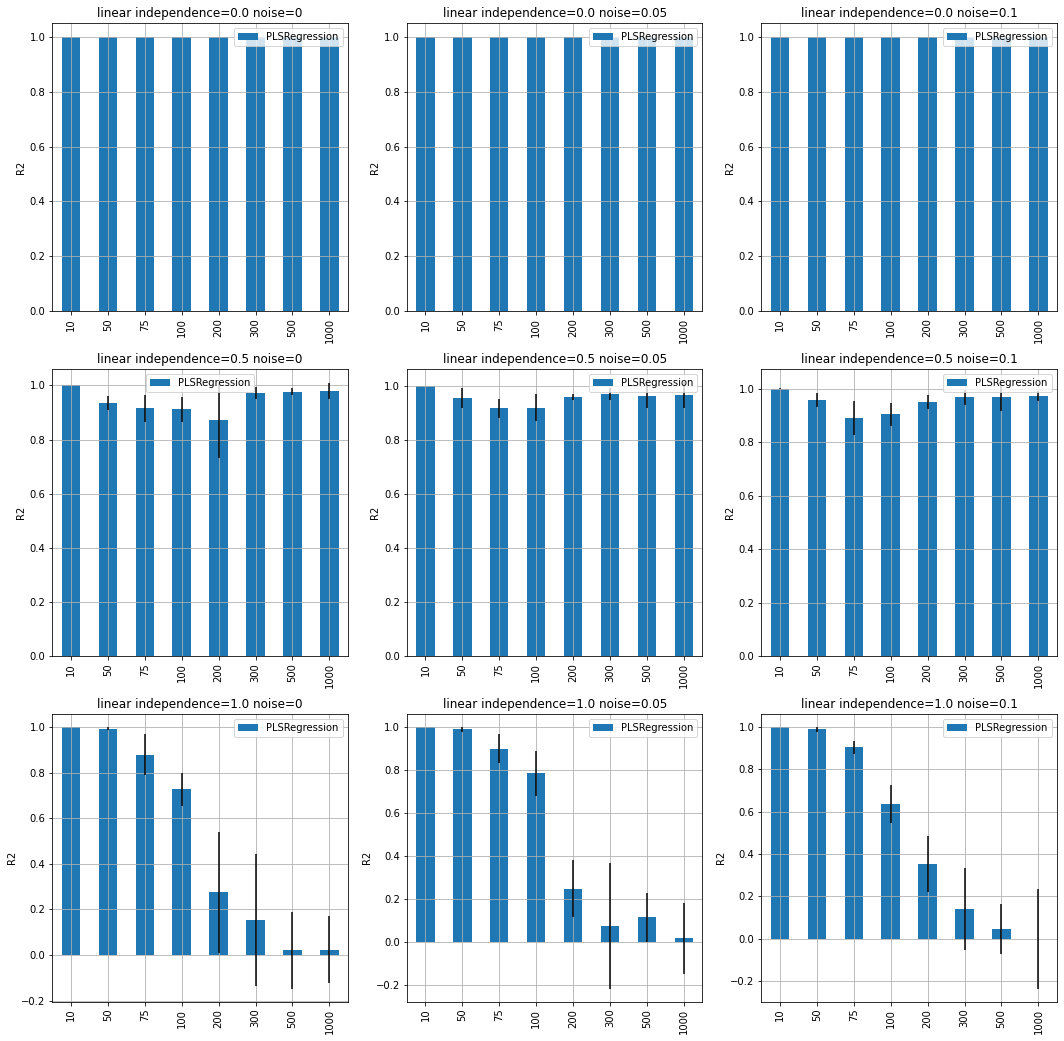

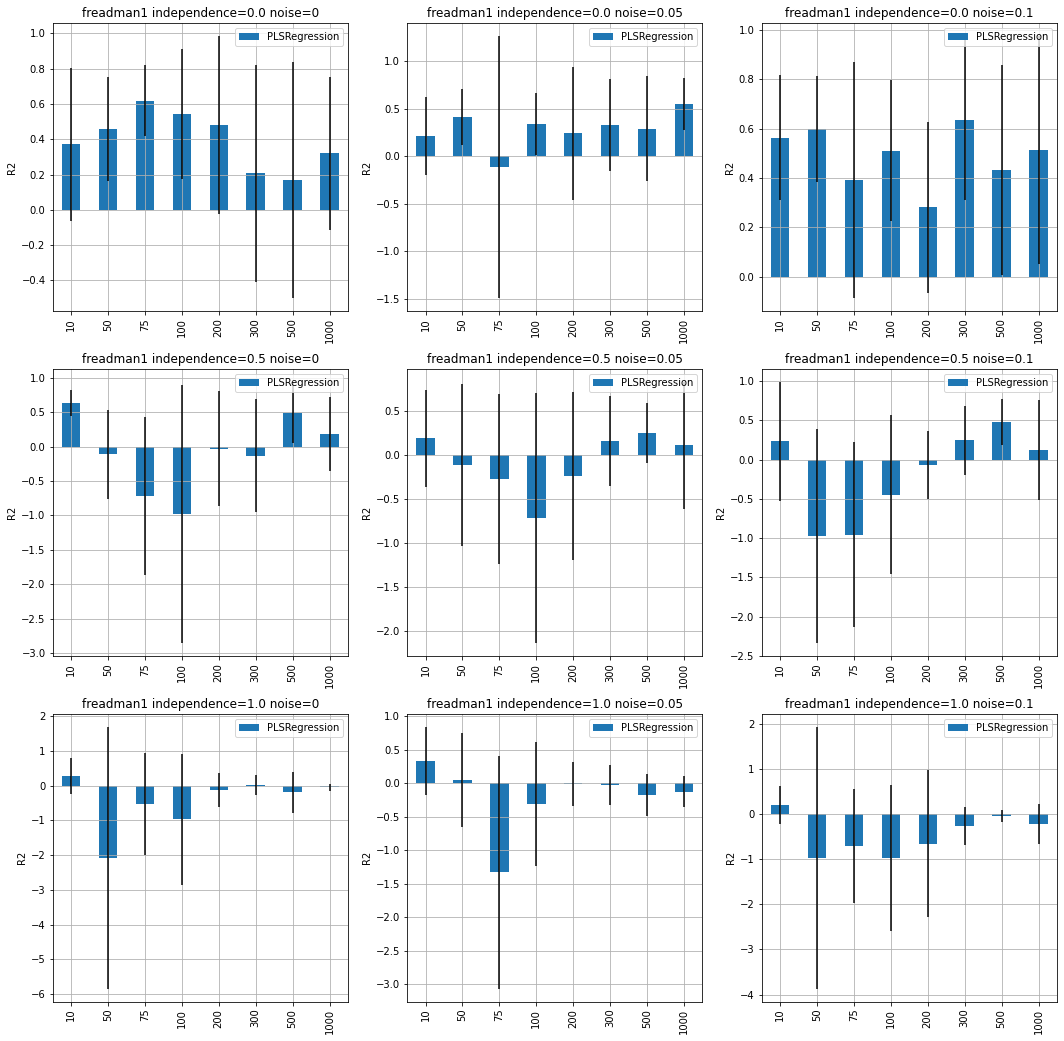

In [76]:
from sampledataset_generator import experiment

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cross_decomposition import PLSRegression

experiment.benchmark(
    "PLSRegression", 
    make_pipeline(
        StandardScaler(), 
        PLSRegression(n_components=10)
        )
    )

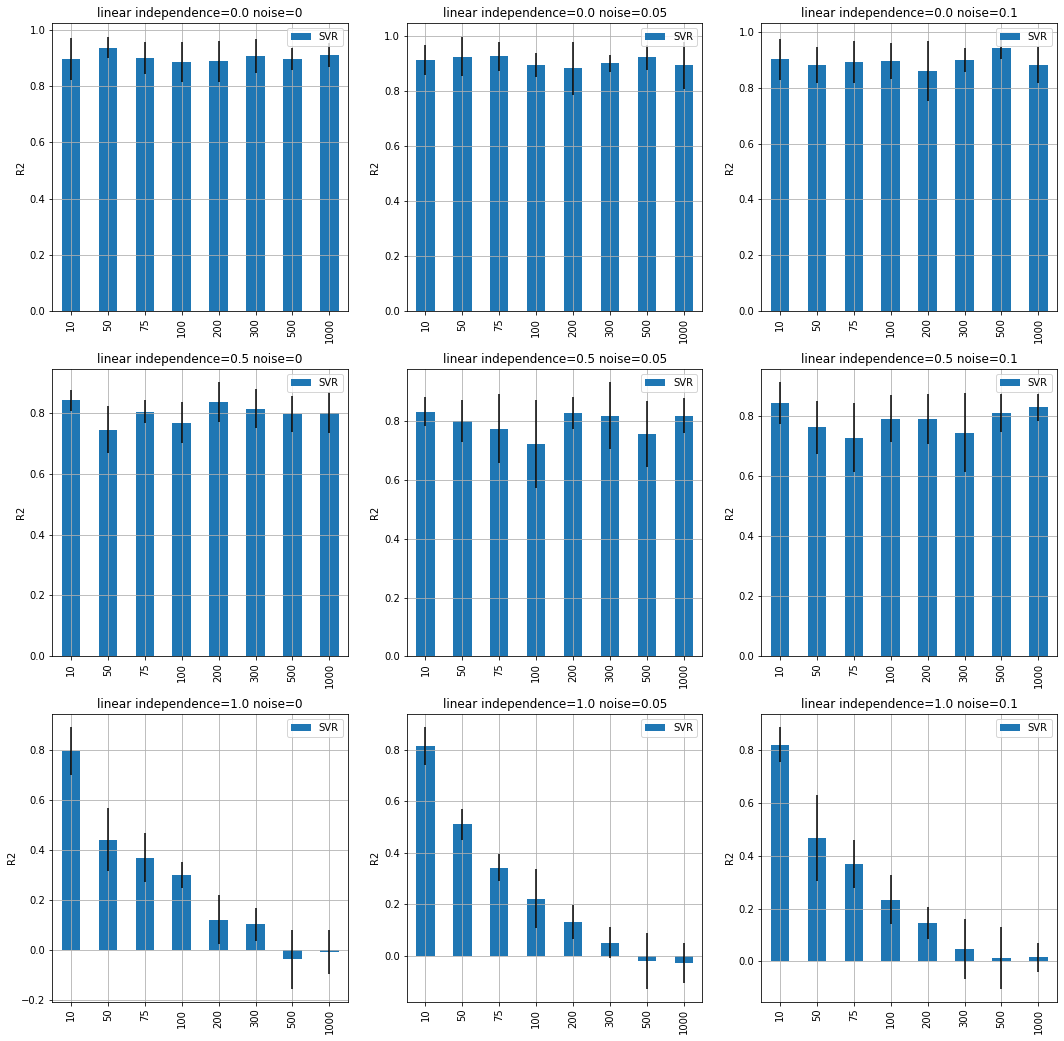

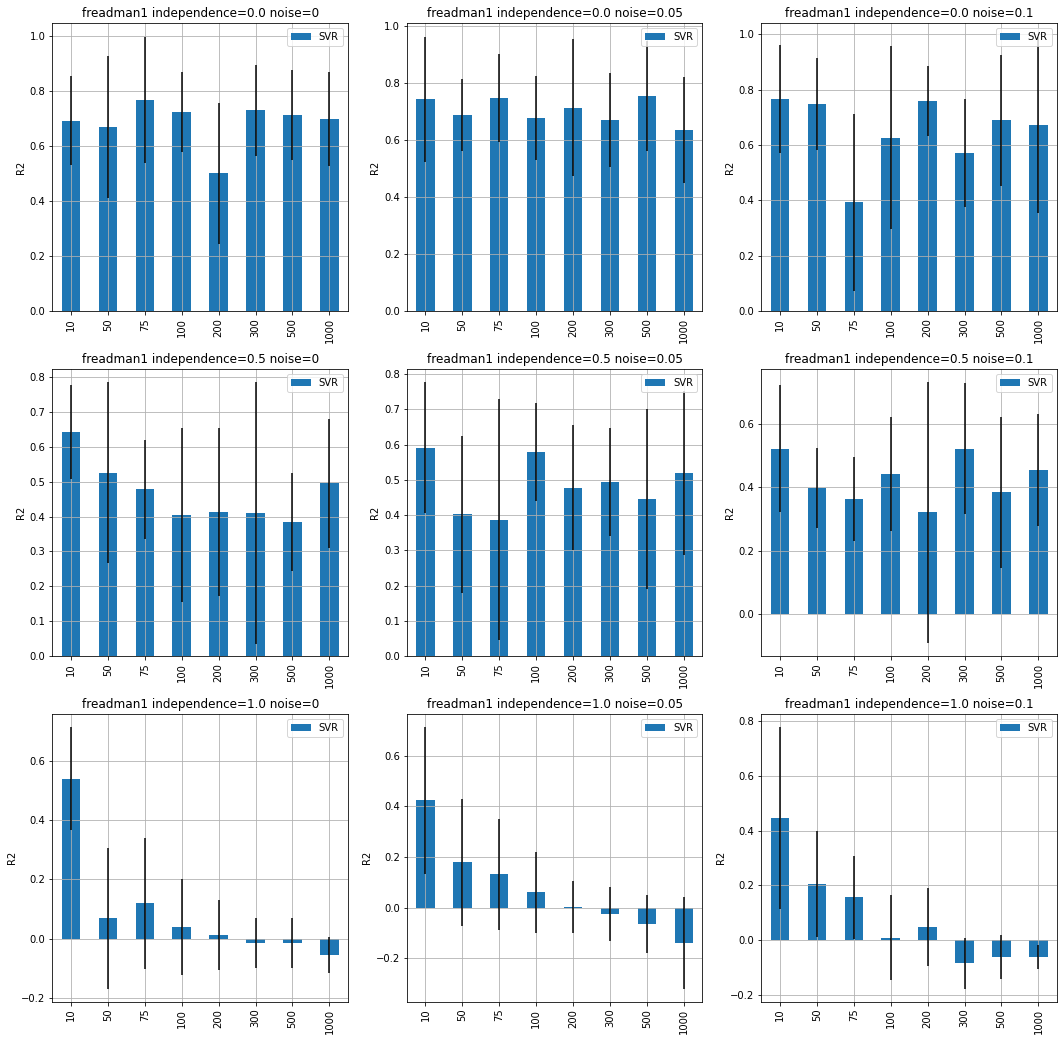

In [77]:
from sampledataset_generator import experiment

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

experiment.benchmark(
    "SVR", 
    make_pipeline(
        StandardScaler(), 
        SVR(C=50, gamma='auto', epsilon=1e-05)
        )
    )

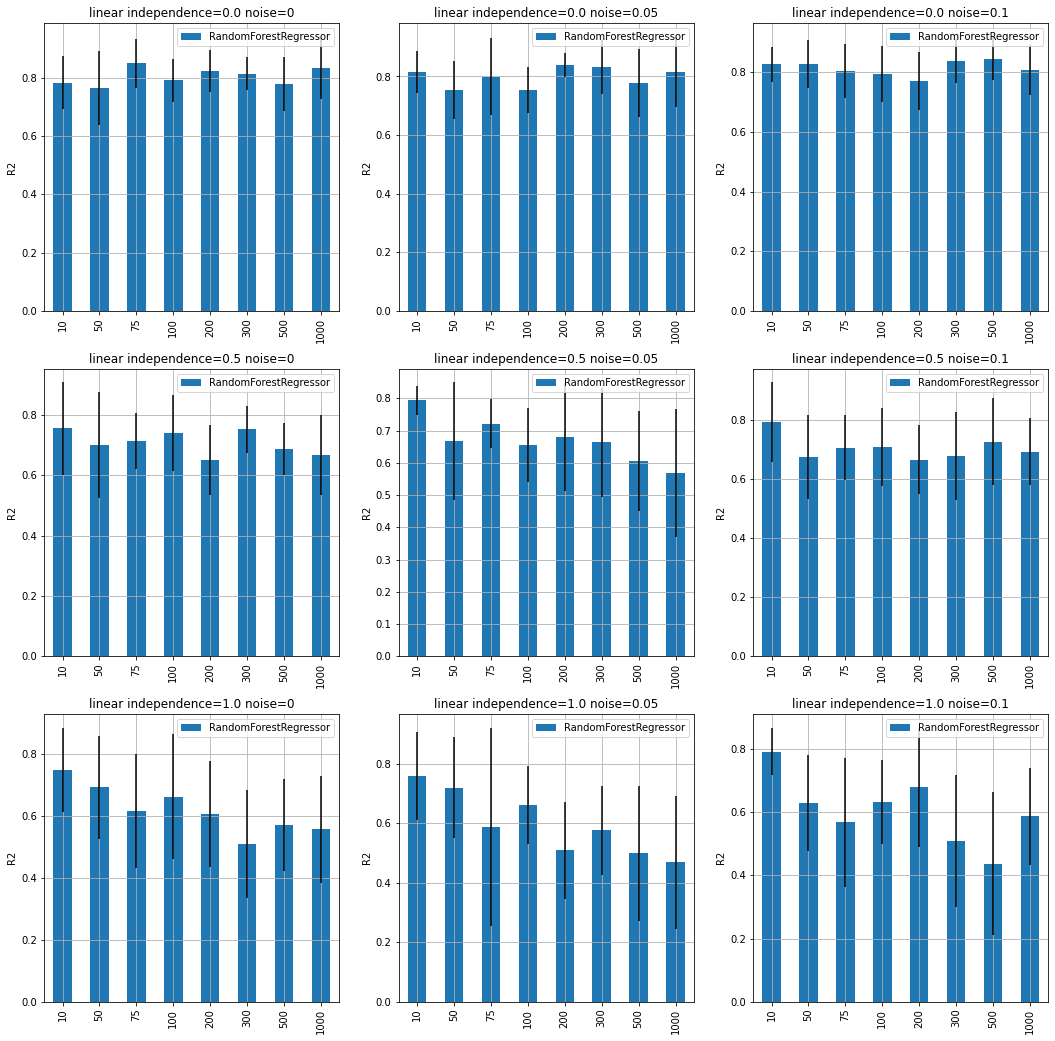

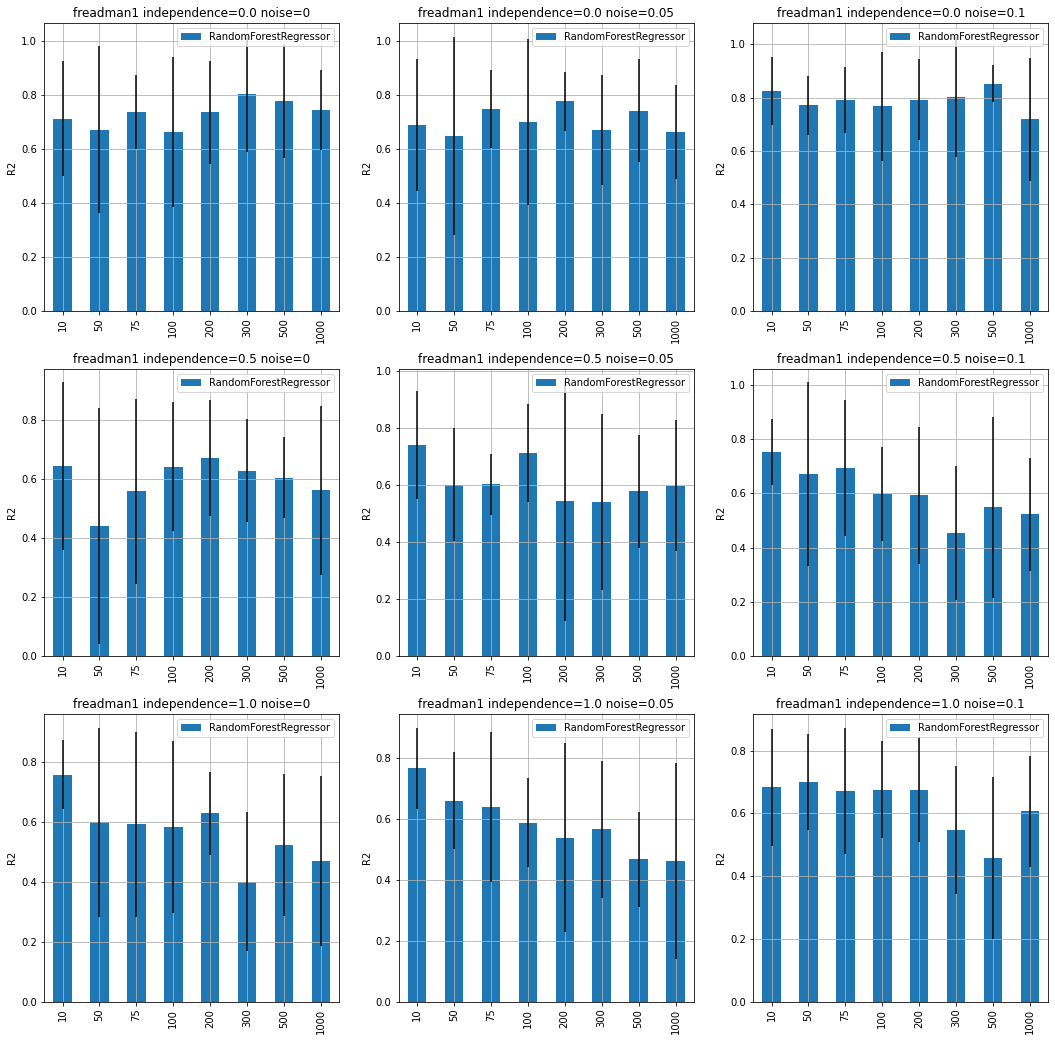

In [78]:
from sampledataset_generator import experiment

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

experiment.benchmark(
    "RandomForestRegressor", 
    make_pipeline(
        StandardScaler(), 
        RandomForestRegressor(
            random_state=1, 
            max_depth=8, 
            n_estimators=16
            )
        )
    )

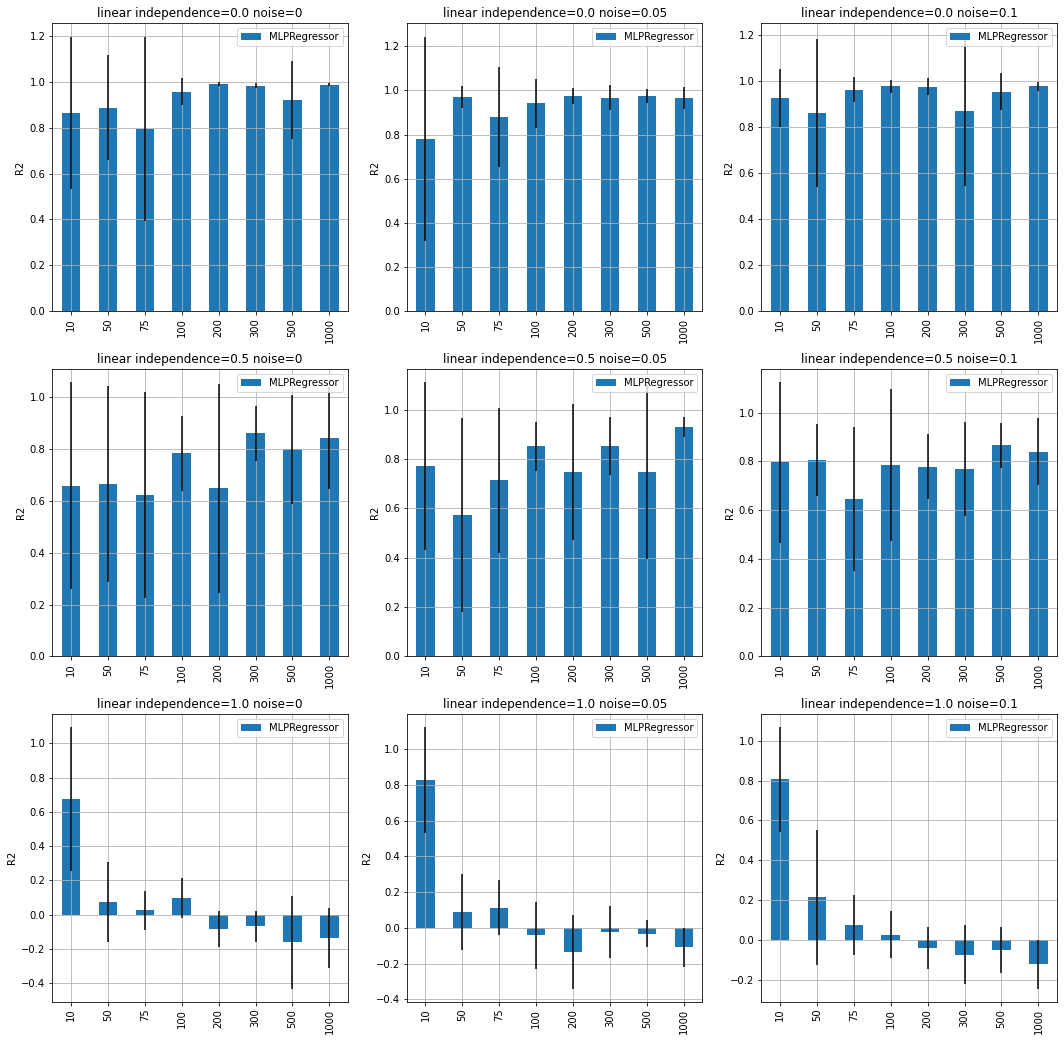

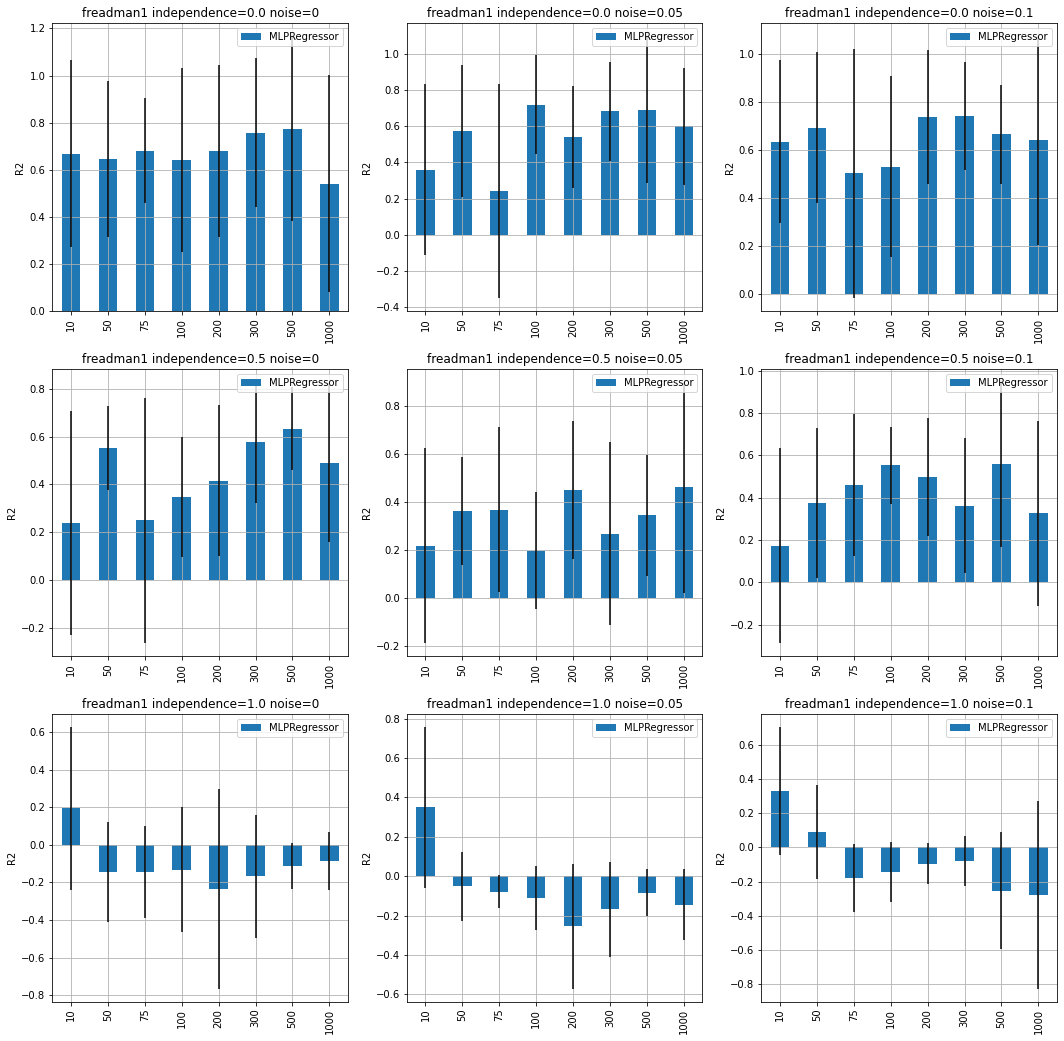

In [79]:
from sampledataset_generator import experiment

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor

experiment.benchmark(
    "MLPRegressor", 
    make_pipeline(
        StandardScaler(), 
        MLPRegressor(
            random_state=1, 
            max_iter=2000, 
            early_stopping=True,
            hidden_layer_sizes=(
                100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100
                )
            )
        )
    )